In [73]:
import os
import time
import netCDF4
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
# datapath = '/Users/yaoling/OneDrive - NTNU/MASCOT_PhD/Missions/Nidelva/July06/Adaptive/Data/'
# figpath = '/Users/yaoling/OneDrive - NTNU/MASCOT_PhD/Missions/Nidelva/July06/Adaptive/fig/'
# from usr_func import *
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.style': 'oblique'})
datapath = '/Users/yaoling/OneDrive - NTNU/MASCOT_PhD/Data/Porto/In-situ/Tore/143337_follow_ntnu/mra/csv/'

#% Data extraction from the raw data
rawTemp = pd.read_csv(datapath + "Temperature.csv", delimiter=', ', header=0, engine='python')
rawLoc = pd.read_csv(datapath + "EstimatedState.csv", delimiter=', ', header=0, engine='python')
rawSal = pd.read_csv(datapath + "Salinity.csv", delimiter=', ', header=0, engine='python')
# rawDepth = pd.read_csv(datapath + "Depth.csv", delimiter=', ', header=0, engine='python')
# rawGPS = pd.read_csv(datapath + "GpsFix.csv", delimiter=', ', header=0, engine='python')
# rawCurrent = pd.read_csv(datapath + "EstimatedStreamVelocity.csv", delimiter=', ', header=0, engine='python')


# To group all the time stamp together, since only second accuracy matters
rawSal.iloc[:, 0] = np.ceil(rawSal.iloc[:, 0])
rawTemp.iloc[:, 0] = np.ceil(rawTemp.iloc[:, 0])
rawCTDTemp = rawTemp[rawTemp.iloc[:, 2] == 'Water Quality Sensor']
rawLoc.iloc[:, 0] = np.ceil(rawLoc.iloc[:, 0])
# rawDepth.iloc[:, 0] = np.ceil(rawDepth.iloc[:, 0])
# rawDepth.iloc[:, 0] = np.ceil(rawDepth.iloc[:, 0])

# lat_origin, lon_origin = 41.10251, -8.669811
circumference = 40075000
def deg2rad(deg):
    return deg / 180 * np.pi
def rad2deg(rad):
    return rad / np.pi * 180
def latlon2xy(lat, lon, lat_origin, lon_origin):
    x = deg2rad(lat - lat_origin) / 2 / np.pi * circumference
    y = deg2rad(lon - lon_origin) / 2 / np.pi * circumference * np.cos(deg2rad(lat))
    return x, y

# indices used to extract data
lat_origin = rawLoc["lat (rad)"].groupby(rawLoc["timestamp"]).mean()
lon_origin = rawLoc["lon (rad)"].groupby(rawLoc["timestamp"]).mean()
x_loc = rawLoc["x (m)"].groupby(rawLoc["timestamp"]).mean()
y_loc = rawLoc["y (m)"].groupby(rawLoc["timestamp"]).mean()
z_loc = rawLoc["z (m)"].groupby(rawLoc["timestamp"]).mean()
depth = rawLoc["depth (m)"].groupby(rawLoc["timestamp"]).mean()
time_loc = rawLoc["timestamp"].groupby(rawLoc["timestamp"]).mean()
time_sal= rawSal["timestamp"].groupby(rawSal["timestamp"]).mean()
time_temp = rawCTDTemp["timestamp"].groupby(rawCTDTemp["timestamp"]).mean()
dataSal = rawSal["value"].groupby(rawSal["timestamp"]).mean()
dataTemp = rawCTDTemp.iloc[:, -1].groupby(rawCTDTemp["timestamp"]).mean()

#% Rearrange data according to their timestamp
data = []
time_mission = []
x = []
y = []
z = []
d = []
sal = []
temp = []
lat = []
lon = []

for i in range(len(time_loc)):
    if np.any(time_sal.isin([time_loc.iloc[i]])) and np.any(time_temp.isin([time_loc.iloc[i]])):
        time_mission.append(time_loc.iloc[i])
        x.append(x_loc.iloc[i])
        y.append(y_loc.iloc[i])
        z.append(z_loc.iloc[i])
        d.append(depth.iloc[i])
        lat_temp = rad2deg(lat_origin.iloc[i]) + rad2deg(x_loc.iloc[i] * np.pi * 2.0 / circumference)
        lat.append(lat_temp)
        lon.append(rad2deg(lon_origin.iloc[i]) + rad2deg(y_loc.iloc[i] * np.pi * 2.0 / (circumference * np.cos(deg2rad(lat_temp)))))
        sal.append(dataSal[time_sal.isin([time_loc.iloc[i]])].iloc[0])
        temp.append(dataTemp[time_temp.isin([time_loc.iloc[i]])].iloc[0])
    else:
        print(datetime.fromtimestamp(time_loc.iloc[i]))
        continue

lat = np.array(lat).reshape(-1, 1)
lon = np.array(lon).reshape(-1, 1)
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
z = np.array(z).reshape(-1, 1)
d = np.array(d).reshape(-1, 1)
sal = np.array(sal).reshape(-1, 1)
temp = np.array(temp).reshape(-1, 1)
time_mission = np.array(time_mission).reshape(-1, 1)

datasheet = np.hstack((time_mission, lat, lon, x, y, z, d, sal, temp))
# np.savetxt(figpath + "../data.txt", datasheet, delimiter = ",")




2021-09-21 16:33:38
2021-09-21 16:34:26
2021-09-21 16:35:30
2021-09-21 16:36:37
2021-09-21 16:37:46
2021-09-21 16:38:53
2021-09-21 16:40:11
2021-09-21 16:41:16
2021-09-21 16:42:32
2021-09-21 16:43:43
2021-09-21 16:44:46
2021-09-21 16:45:49
2021-09-21 16:46:57
2021-09-21 16:48:01
2021-09-21 16:49:03
2021-09-21 16:50:23
2021-09-21 16:51:25
2021-09-21 16:52:23
2021-09-21 16:53:27
2021-09-21 16:54:34
2021-09-21 16:55:07


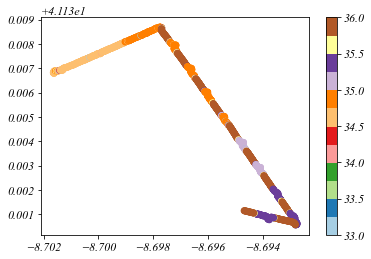

In [81]:
plt.scatter(lon, lat, c = sal, cmap = "Paired", vmin = 33, vmax = 36)
plt.colorbar()
plt.show()

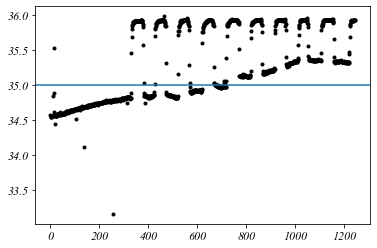

In [88]:
sal_t = sal[sal>33]
plt.plot(sal_t, 'k.')
plt.axhline(35)
plt.show()

In [74]:
import plotly.graph_objects as go
import plotly

ind = np.where(sal >= 25)[0]

fig = go.Figure(data=[go.Scatter3d(
    x=lon[ind].squeeze(),
    y=lat[ind].squeeze(),
    z=z[ind].squeeze(),
    mode='markers',
    marker=dict(
        size=5,
        color=sal[ind].squeeze(),  # set color to an array/list of desired values
        showscale=True,
        coloraxis="coloraxis"
    )
)])
fig.update_coloraxes(colorscale="jet")
figpath = "/Users/yaoling/OneDrive - NTNU/MASCOT_PhD/Data/Porto/In-situ/Tore/fig/"
fig.show()
# plotly.offline.plot(fig, filename=figpath + "test.html", auto_open=True)


# plt.scatter(lon, lat, c = sal, cmap = "Paired", vmin = 33, vmax = 36)
# plt.colorbar()
# plt.show()

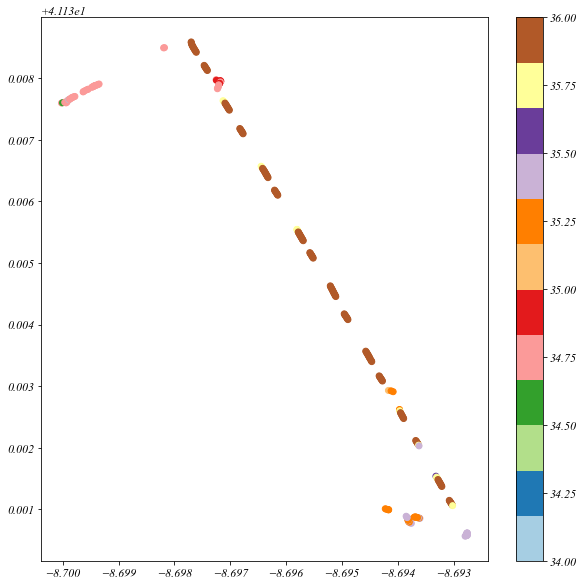

Time consumed:  0.03326272964477539
spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   555.19
Sill:              0.22
Nugget:            0.04
        


/usr/local/lib/python3.9/site-packages/scikit_gstat-0.5.4-py3.9.egg/skgstat/plotting/variogram_plot.py:96: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



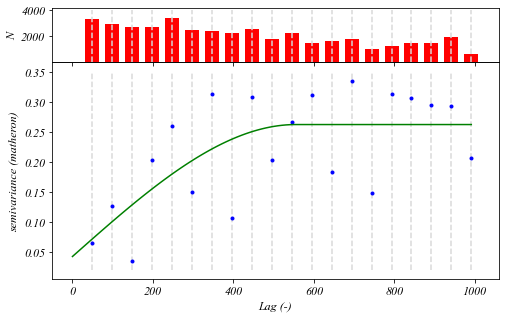

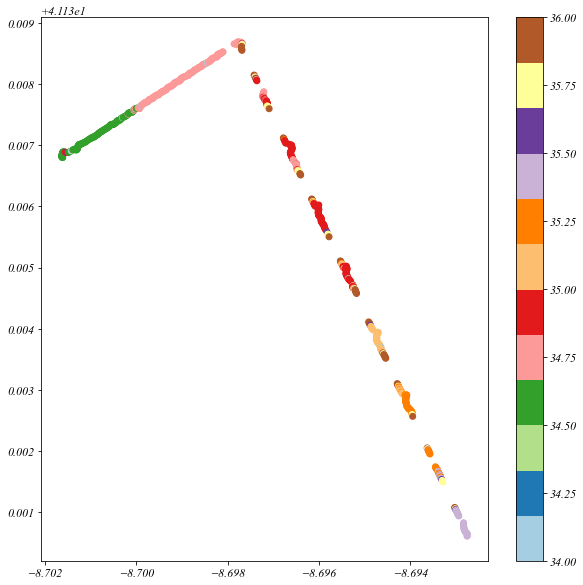

Time consumed:  0.18169879913330078
spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   556.65
Sill:              0.34
Nugget:            1.17
        


/usr/local/lib/python3.9/site-packages/scikit_gstat-0.5.4-py3.9.egg/skgstat/plotting/variogram_plot.py:96: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



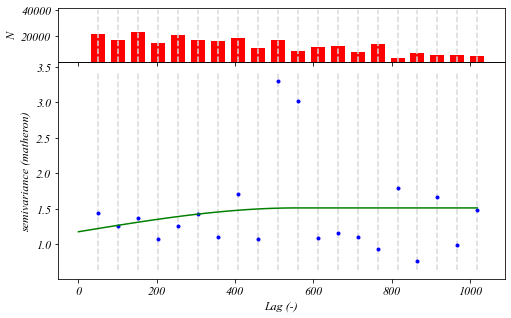

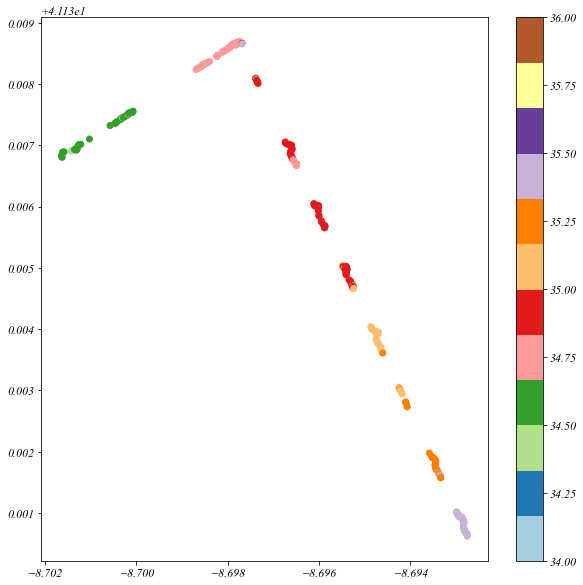

Time consumed:  0.03835916519165039
spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   1018.68
Sill:              1.42
Nugget:            0.98
        


/usr/local/lib/python3.9/site-packages/scikit_gstat-0.5.4-py3.9.egg/skgstat/plotting/variogram_plot.py:96: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



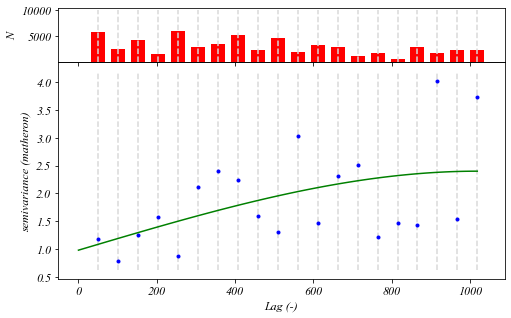

In [80]:

def RoundBase(number, base = .5):
    nearest_multiple = base * np.round(number/base)
    return nearest_multiple

def allocateLateral(lat, lon, z, sal, depth, tolerance):
#     print(depth + tolerance)
#     print(depth - tolerance)
    ind_depth = np.where((z <= depth + tolerance) & (z >= depth - tolerance))[0]
    lat_depth = lat[ind_depth]
    lon_depth = lon[ind_depth]
    sal_depth = sal[ind_depth]
    return lat_depth, lon_depth, sal_depth

depth_obs = [0, 2.5, 5]

for depth in depth_obs:
    lat_s, lon_s, sal_s = allocateLateral(lat, lon, z, sal, depth, 2)

    plt.figure(figsize = (10, 10))
    plt.scatter(lon_s, lat_s, c = sal_s, cmap = "Paired", vmin = 34, vmax = 36)
    plt.colorbar()
    plt.show()

    # Convert lat lon to x y, where x is pointing north, y is pointing east, and depth is z
    lat_origin, lon_origin = 41.10251, -8.669811
    circumference = 40075000
    def deg2rad(deg):
        return deg / 180 * np.pi
    def rad2deg(rad):
        return rad / np.pi * 180
    def latlon2xy(lat, lon, lat_origin, lon_origin):
        x = deg2rad(lat - lat_origin) / 2 / np.pi * circumference
        y = deg2rad(lon - lon_origin) / 2 / np.pi * circumference * np.cos(deg2rad(lat))
        # x_, y_ = self.R.T @ np.vstack(x, y) # convert it back
        return x, y
    x, y = latlon2xy(lat_s, lon_s, lat_origin, lon_origin) # convert to x, y for metre metric

    range_coef = []
    sill_coef = []
    nugget_coef = []
    # Find the variogram
    from skgstat import Variogram
    t1 = time.time()
    V_v = Variogram(coordinates = np.hstack((x, y)), values = sal_s.squeeze(), n_lags = 20, maxlag = 3000, use_nugget=True)
    range_coef.append(V_v.cof[0])
    sill_coef.append(V_v.cof[1])
    nugget_coef.append(V_v.cof[2])
    t2 = time.time()
    print("Time consumed: ", t2 - t1)

    fig = V_v.plot(hist = True)
    print(V_v)


spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   0.32
Sill:              0.00
Nugget:            0.00
        


/usr/local/lib/python3.9/site-packages/scikit_gstat-0.5.4-py3.9.egg/skgstat/plotting/variogram_plot.py:96: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



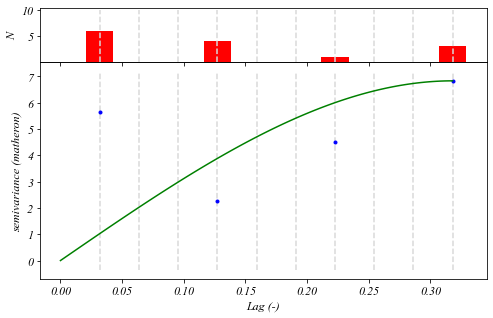

In [76]:
# Here comes the depth variogram
range_coef_d = []
sill_coef_d = []
nugget_coef_d = []
# Find the variogram
from skgstat import Variogram

for i in range(len(lat)):
#     print(i)
    lat_now = lat[i]
    lon_now = lon[i]
    depth_now = z[i]
    distLat = lat - lat_now
    distLon = lon - lon_now
    dist = np.sqrt(distLat ** 2 + distLon ** 2)
    ind_neighbour = np.where(dist <= .0001)[0] # select the current location, but different depths
#     print(ind_neighbour)
    t1 = time.time()
    V_v = Variogram(coordinates = np.hstack((np.zeros([len(ind_neighbour), 1]), np.array(z[ind_neighbour]).reshape(-1,1))), values = sal[ind_neighbour].squeeze(),  n_lags = 10, maxlag = 10)
#     print(V_v)
    range_coef_d.append(V_v.cof[0])
    sill_coef_d.append(V_v.cof[1])
#     nugget_coef.append(V_v.cof[2])
    t2 = time.time()
#     print("Time consumed: ", t2 - t1)

V_v.plot(hist = True)
print(V_v)

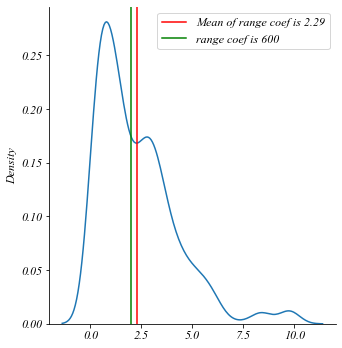

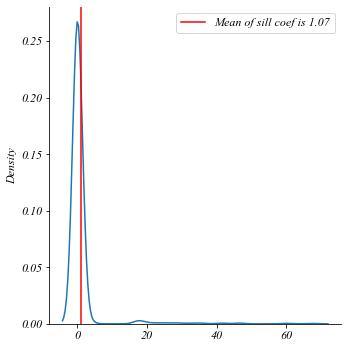

In [77]:
import seaborn as sns
sns.displot(range_coef_d, kind = "kde")
plt.axvline(np.mean(range_coef_d), c = 'r', label = "Mean of range coef is {:.2f}".format(np.mean(range_coef_d)))
plt.axvline(2, c = 'g', label = "range coef is 600")
plt.legend()
plt.show()

sns.displot(sill_coef_d, kind = "kde")
plt.axvline(np.mean(sill_coef_d), c = 'r', label = "Mean of sill coef is {:.2f}".format(np.mean(sill_coef_d)))
plt.legend()
plt.show()
